In [1]:
%store -r X
%store -r y

In [2]:
X.shape

(535, 4096)

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [18]:
model_params = {
    'svm': {
        'model': SVC(probability=True),
        'params' : {
            'svc__gamma' : ['scale', 'auto'],
            'svc__C': [1,10,50,100],
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,10,50,100],
            'randomforestclassifier__criterion' : ["gini", "entropy"],
            'randomforestclassifier__max_depth':  [1,5,10,20]
        }
        
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'logisticregression__C': [1,10,50,100]
        }
    }
}

In [45]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], return_train_score=False,n_jobs=8,verbose=3)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-pack

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


,model,best_score,best_params
0,svm,0.836498,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker..."
1,random_forest,0.740821,{'randomforestclassifier__criterion': 'entropy...
2,logistic_regression,0.848153,"{'logisticregression__C': 1, 'logisticregressi..."


In [46]:
print('SVM performance on test:',best_estimators['svm'].score(X_test,y_test))
print('SVM performance on train:',best_estimators['svm'].score(X_train,y_train))

SVM performance on test: 0.9158878504672897
SVM performance on train: 1.0


In [47]:
print('SVM performance on test:',best_estimators['logistic_regression'].score(X_test,y_test))
print('SVM performance on train:',best_estimators['logistic_regression'].score(X_train,y_train))

SVM performance on test: 0.9158878504672897
SVM performance on train: 1.0


In [63]:
%store -r class_dict
class_dict

{'babarazam': 0,
 'kane_s_w': 1,
 'root66': 2,
 'steve_smith49': 3,
 'viratkohli': 4}

In [65]:
best_clf = best_estimators['svm']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear', probability=True))])

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[20,  0,  0,  0,  0],
       [ 1, 18,  0,  0,  1],
       [ 0,  0, 11,  4,  0],
       [ 0,  0,  0, 32,  0],
       [ 1,  1,  0,  1, 17]], dtype=int64)

Text(69.0, 0.5, 'Truth')

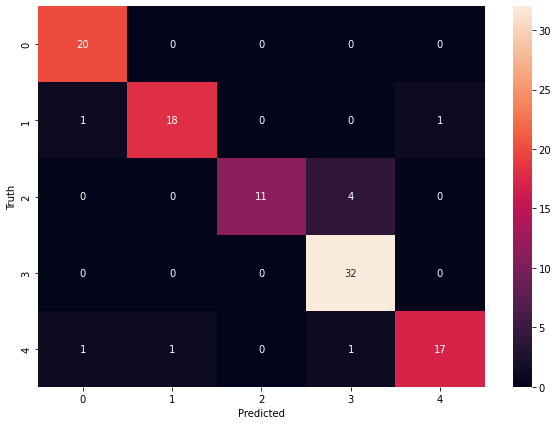

In [68]:
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, '../../server/artifacts/saved_model.pkl') 

['../../server/artifacts/saved_model.pkl']

In [71]:
import json
with open("../../server/artifacts/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
c